__Problem Statement:__

Business case:
- Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

- In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

- In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import pickle

In [225]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [5]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
for col in df.columns:
    if df[col].dtypes=="object":
        print(df[col].value_counts())
        print("\n")

05-08-1992    3
28-04-1992    3
01-01-2006    3
07-12-1995    2
30-08-1993    2
             ..
29-07-1996    1
19-10-2001    1
11-01-2009    1
28-09-1994    1
11-12-1994    1
Name: policy_bind_date, Length: 951, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


reading 

Observations:

So, in these 3 features, we have a "?" as a third category.
- collision_type
- property_damage
- police_report_available

We can impute them using mode but that's a crude way of feature engineering. We can check their correlation with the target variable and decide whether to impute them or drop

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Let's check if there are any null values present in the numerical columns:

In [200]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [65]:
df.nunique().sort_values(ascending=False)

policy_number                  1000
incident_location              1000
insured_zip                     995
policy_annual_premium           991
policy_bind_date                951
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
incident_date                    60
age                              46
auto_model                       39
incident_hour_of_the_day         24
auto_year                        21
insured_hobbies                  20
auto_make                        14
insured_occupation               14
umbrella_limit                   11
insured_education_level           7
incident_state                    7
incident_city                     7
insured_relationship              6
authorities_contacted             5
witnesses                         4
incident_severity           

Observations: 
- We can safely drop "policy_number","incident_location","insured_zip","policy_annual_premium","policy_bind_date","_c39"
- Apart from these features there are various other features which have a lot of unique values which will be a hindrance, but we can drop them after scaling and checking their relation with the target variable.
- Also, we can drop individual types of claims as it has been covered under the feature of total_claim_amount.

In [227]:
df.drop_duplicates(inplace=True)

In [201]:
df.shape        #no duplicates were present in the dataset

(1000, 40)

In [226]:
df.drop(["policy_number","incident_location","insured_zip","policy_annual_premium","policy_bind_date","_c39","vehicle_claim","injury_claim","property_claim"],axis=1,inplace=True)

In [203]:
df.shape

(1000, 31)

In [70]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
auto_make                       14
auto_model          

# EDA:

In [228]:
cat_cols=[]
for col in df.columns:
    if df[col].dtypes=="object":
        cat_cols.append(col)
        

In [229]:
cat_df=df[cat_cols].copy()

In [230]:
num_df=df.select_dtypes(exclude="object")

In [207]:
cat_df.nunique().sort_values(ascending=False)

incident_date              60
auto_model                 39
insured_hobbies            20
insured_occupation         14
auto_make                  14
insured_education_level     7
incident_state              7
incident_city               7
insured_relationship        6
authorities_contacted       5
collision_type              4
incident_type               4
incident_severity           4
police_report_available     3
policy_state                3
property_damage             3
policy_csl                  3
insured_sex                 2
fraud_reported              2
dtype: int64

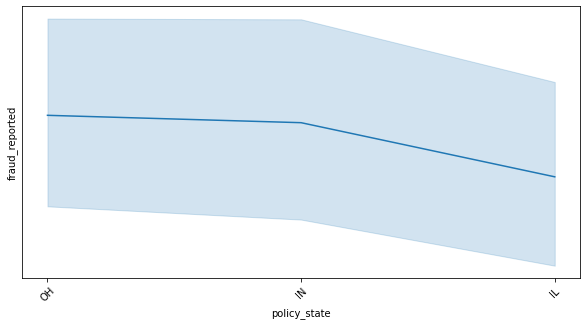

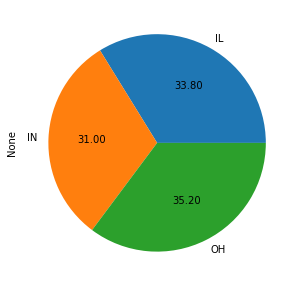

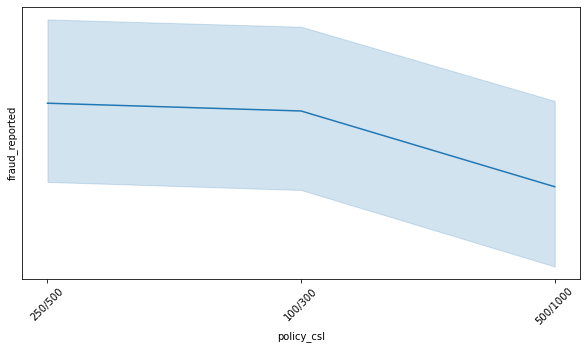

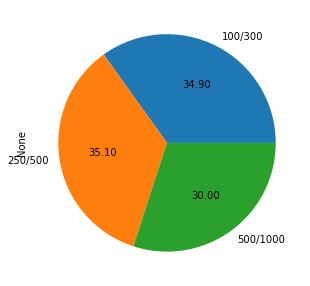

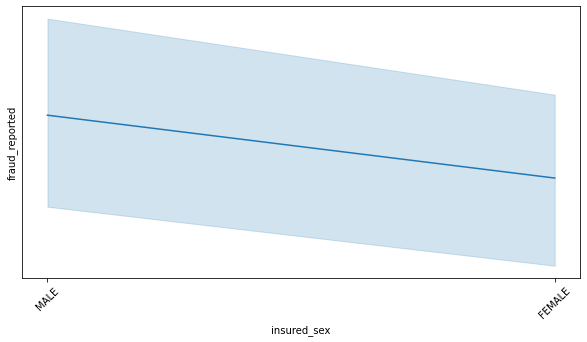

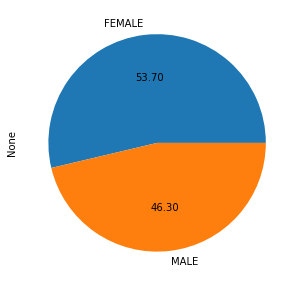

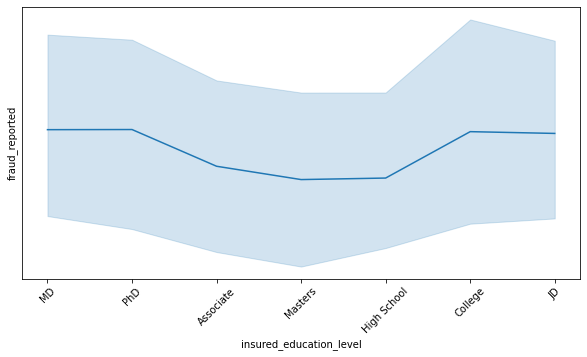

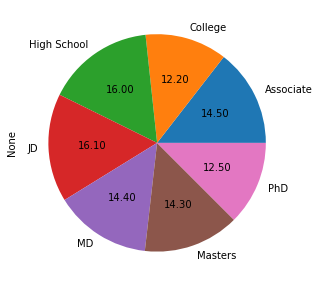

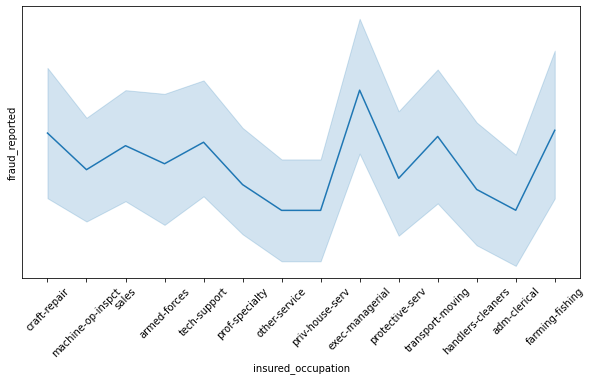

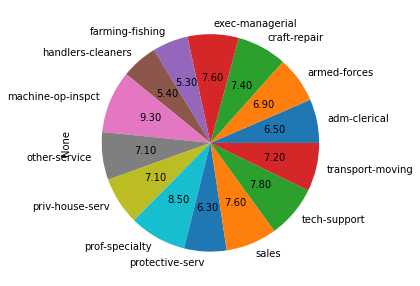

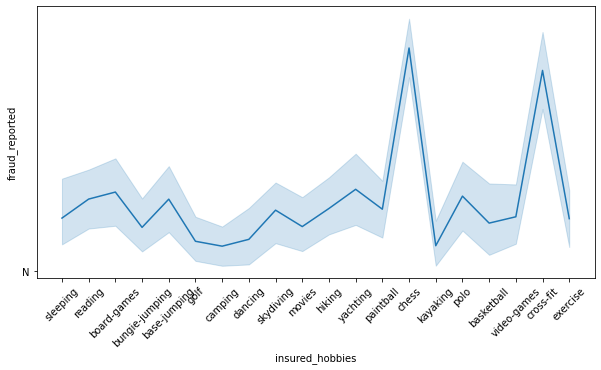

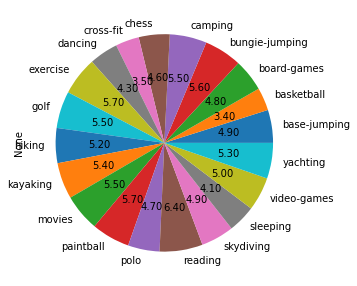

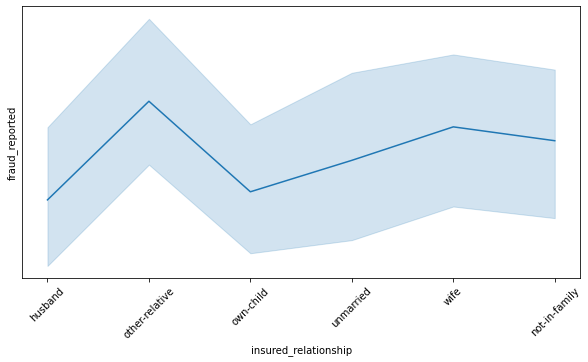

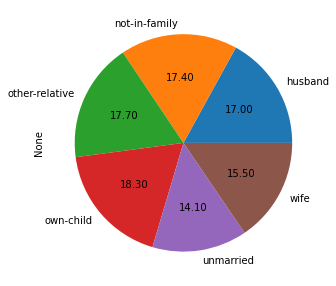

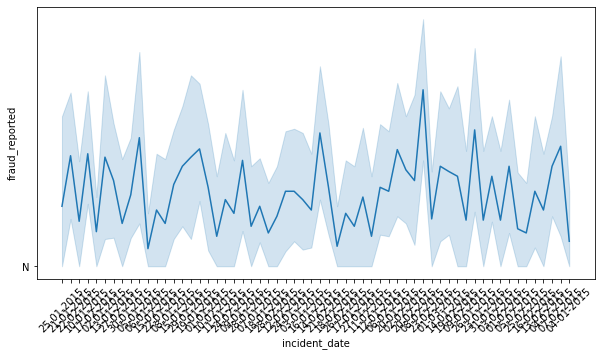

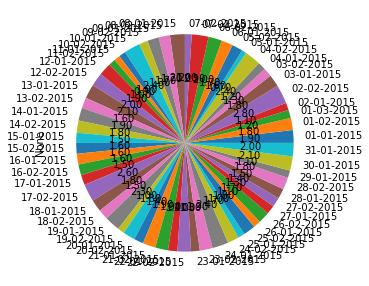

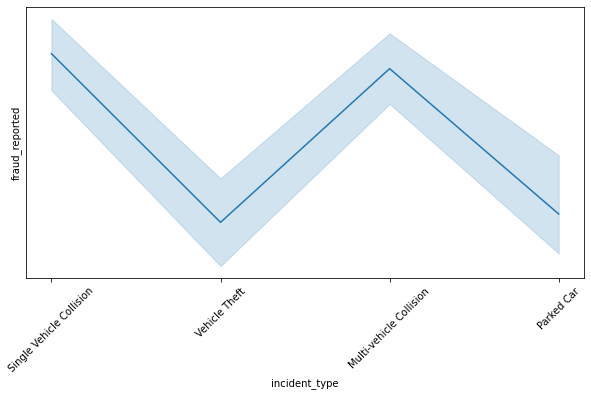

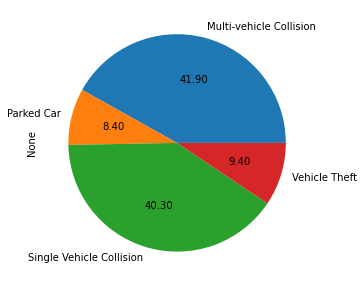

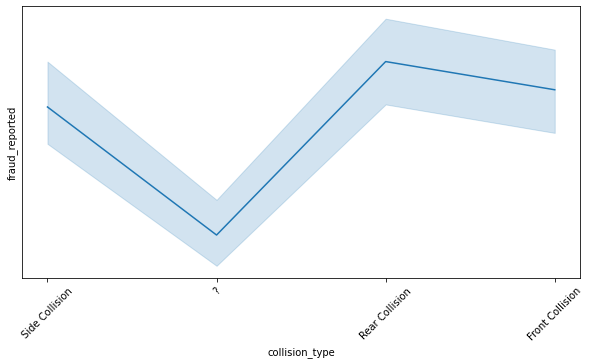

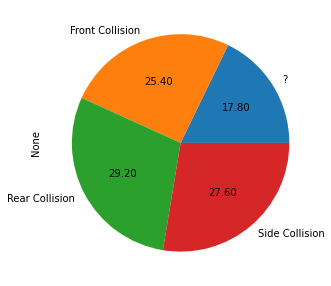

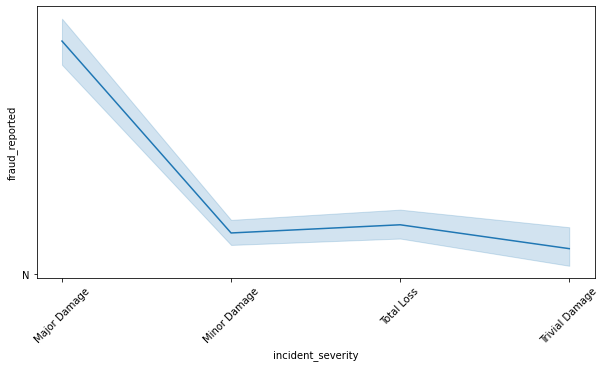

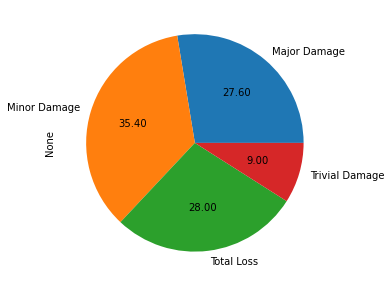

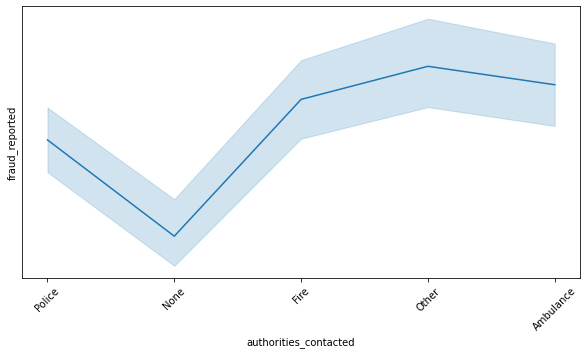

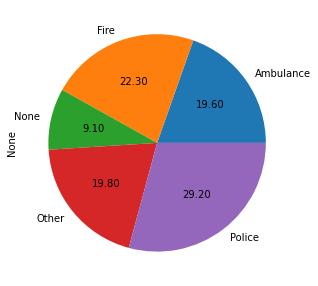

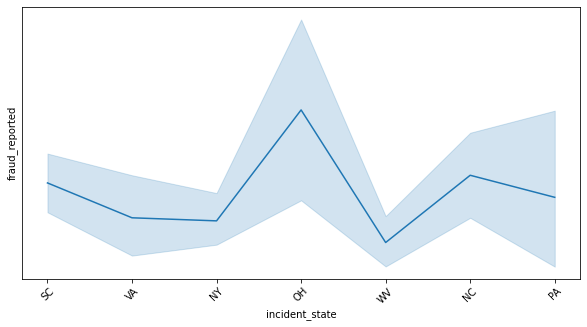

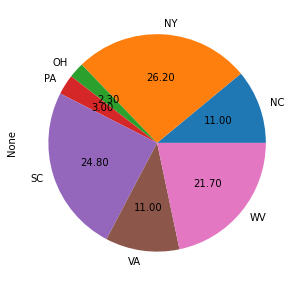

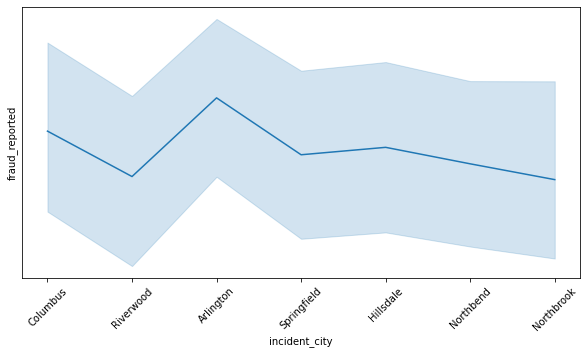

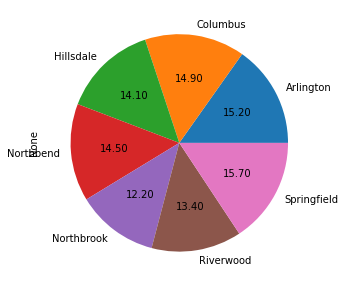

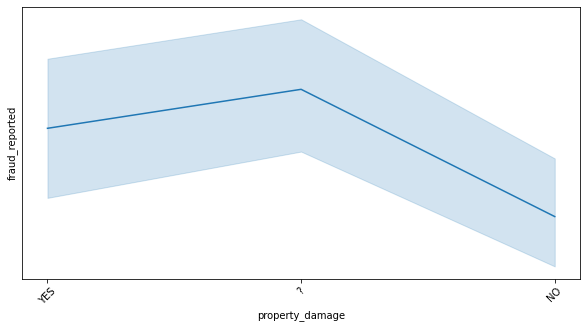

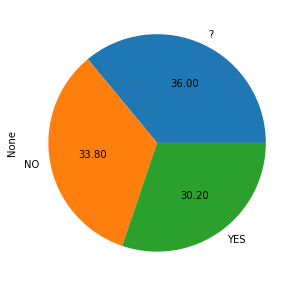

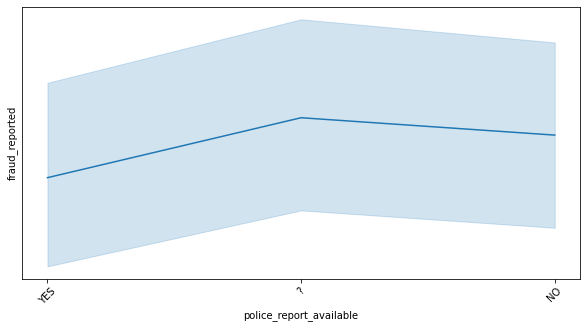

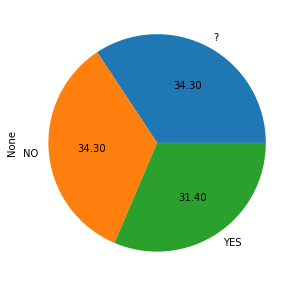

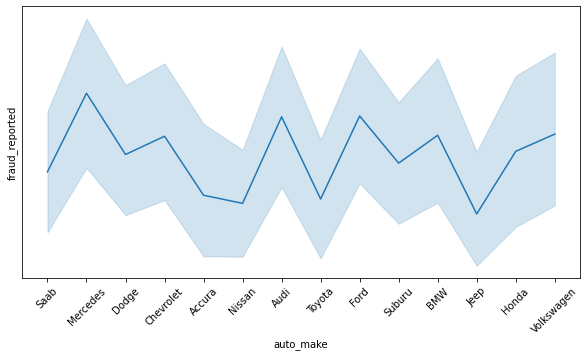

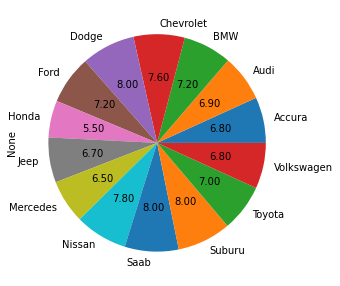

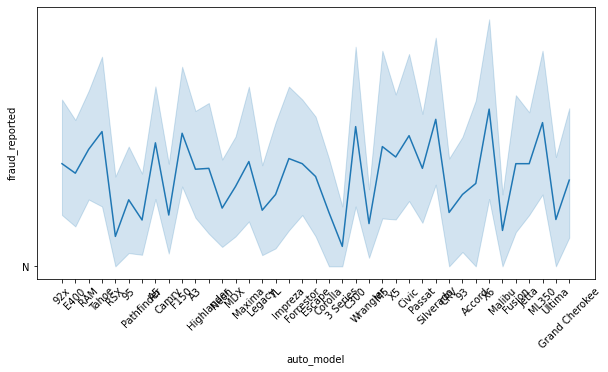

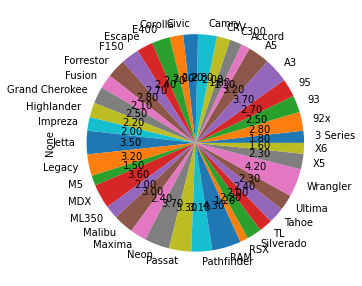

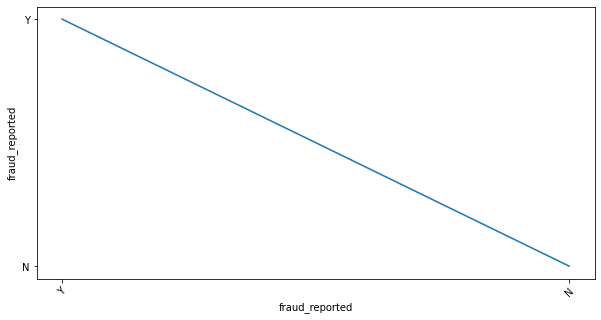

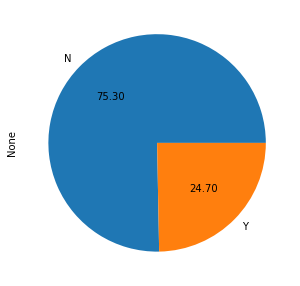

In [135]:
for col in cat_df.columns:
    
        plt.figure(figsize=(10,5))
        sns.lineplot(x=col,y="fraud_reported",data=df)
        plt.xticks(rotation=45)
        plt.show()
                   
        plt.figure(figsize=(10,5))
        cat_df.groupby(col).size().plot(kind='pie', autopct='%.2f')
        plt.show()

Observations:
- There is almost equal number of claims from Ohio, Illinois and Indiana but ohio tops in number of fraud reported
- Combined single limit (CSL):
    CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident. 250/500 and 100/300 are the most reported scores.
- There are more females in the datasets and the frauds reported are marginally higher in males compared to females.
- The education qualification is almost equally distributed among the repondent, high school graduates being the highest barely.
- College, JD and MD are highest fraud reporters among other type of educational qualifications.
- Machine operating inspectors make up the most of the feature size (9.3%). But, highest reporting is in exec managerial positions and farming-fishing occupations.
- Reading being the most common hobby among a multitude of options, it's share is only 6.4% of the total size.
- Customers with Chess and cross-fit as their hobbies have the most reported frauds among the variety of hobbies.
- Maximum number of customers were having their own children as insuredrelationship
- Maximum frauds were reported where the relationship involved an other relative.
- Multi- and Single Vehicle collision have the highest number of frauds reported while the data is also dominated by the number of instances of both in the same order.
- Rear and side collission has been the highest where the rear collission has shown the highest frauds.
- Highest number of major-damage involving accidents were involved in rauds even though they dont constitute to be the major part of the feature.
- "Other" and "Ambulance" have the highest number of frauds when asked for authorities contacted after the accident even though they are not a major reponsive action after any unfortunate event.
- Highest frauds were detected from South Carolina but the percentage of reported and actual claims is the highest in Ohio.
- Maximum number of customers were from arlinton and springfield, but percentage reported was the highest in Arlington.
- Majority of the data has not been labeled and the percentage of reporting is also the highest compared to simple "Yes" or "No" types.
- for more than a third of the data, the police report is unavailable. For another 34.4%, police report is an unnamed label. Missing or mislabeled police report is the dominant category in highest percentage of frauds reported.
- Saab owners constitute about 8% of total customners but the percentage of fraud reporting is the ihghest among them followed by Audi and Ford.
- X6 owners represent only 1.6% of ttoal car owners but they account for the most frauds reported.



**We can see that the target label is imbalanced with "N" dominating the feature with 75.3%. We can use SMOTE to upsample the minority class for the model to not be biased towards one class.**

In [136]:
num_df

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year
0,328,48,1000,0,53300,0,5,1,1,2,71610,2004
1,228,42,2000,5000000,0,0,8,1,0,0,5070,2007
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,2007
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,2014
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,0,0,20,1,0,1,87200,2006
996,285,41,1000,0,70900,0,23,1,2,3,108480,2015
997,130,34,500,3000000,35100,0,4,3,2,3,67500,1996
998,458,62,2000,5000000,0,0,2,1,0,1,46980,1998


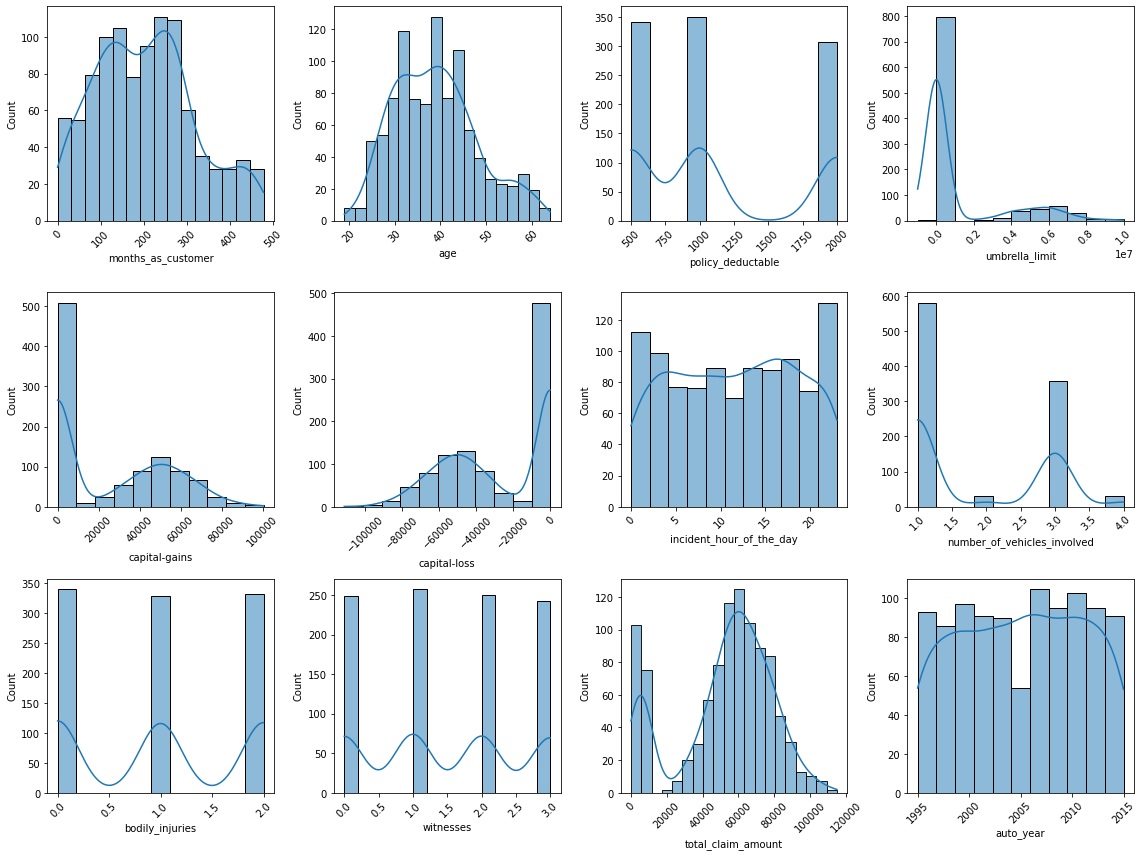

In [150]:
plt.subplots(figsize=(16,12))
x=1
for col in num_df.columns:
    if x<=12:
        plt.subplot(3,4,x)
        sns.histplot(x=col, data=num_df,kde=True)
#         print(cat_df[col].value_counts())
        plt.xticks(rotation=45)
        x+=1
plt.tight_layout()
plt.show()

Observations:
- Maximum number of customers have an age of 40.
- Most customers have been with the company for 100-300 months.
- 500 and 100 is the most common deductible price paid.
- 80% of the people have an umbrella limit of 0.1*e07
- Half of the people don't have either capital gains or capital losses or both. 
- Most of the times, only one vehicle was involved in the claim.
- Total claim amount peaks around 60,000 with almost 13% people claiming.

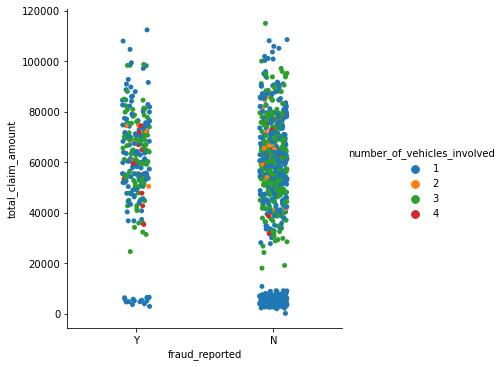

In [153]:
sns.catplot(x="fraud_reported", y="total_claim_amount",hue="number_of_vehicles_involved", data=df)

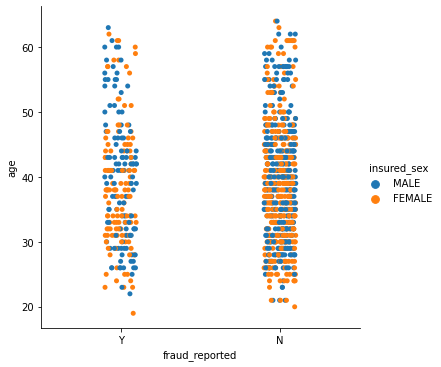

In [154]:
sns.catplot(x="fraud_reported", y="age",hue="insured_sex",data=df)

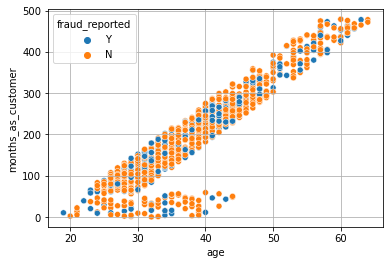

In [157]:
sns.scatterplot(y="months_as_customer", x="age",hue="fraud_reported",data=df)
plt.grid(True)

No trend can be identified from this as more months equals more age. Some of the customers have just joined so that's why there age stretches from 20 to 43

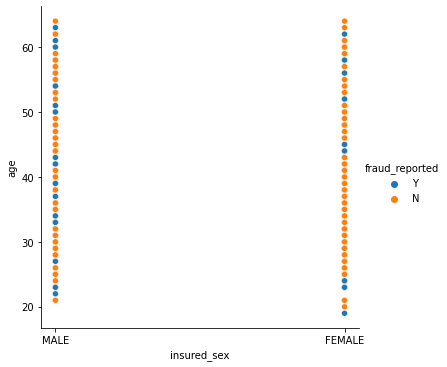

In [162]:
sns.relplot(hue="fraud_reported", y="age",x="insured_sex",data=df)

There are marginally more females but frauds are more frequently reported among men.

In [167]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [190]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'auto_year'],
      dtype='object')

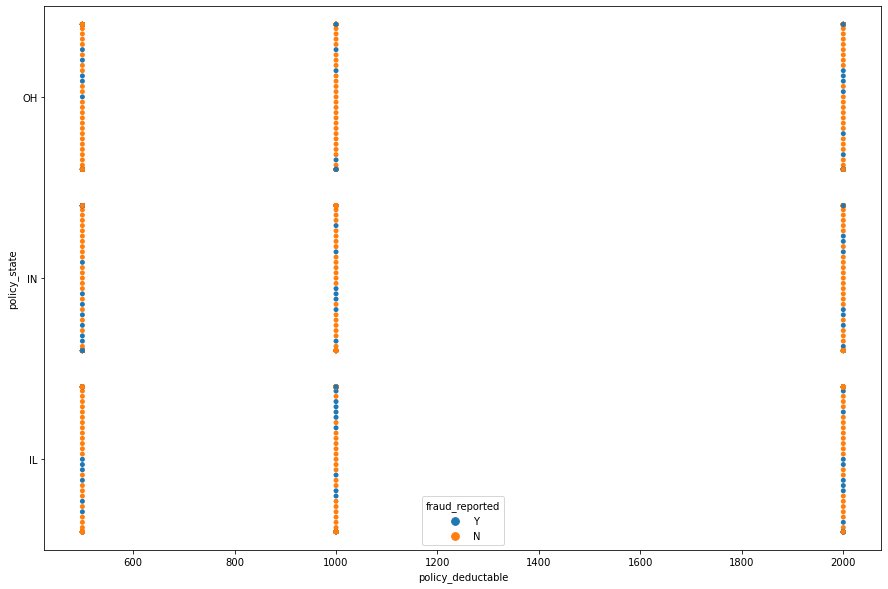

In [194]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='policy_deductable',hue='fraud_reported',y= "policy_state",data=df)
plt.show()

customers having a policy from illinois having a 1000dollars deductible have been reported as fraud whereas customers with 500 and 2000 dollars deductible has a lower amount of frauds.For indiana policy holders, number of frauds is highest when the deductible is 2000 dollars. For ohio policy holders, its the lowest when deductible is 1000 dollars

<AxesSubplot:xlabel='age', ylabel='count'>

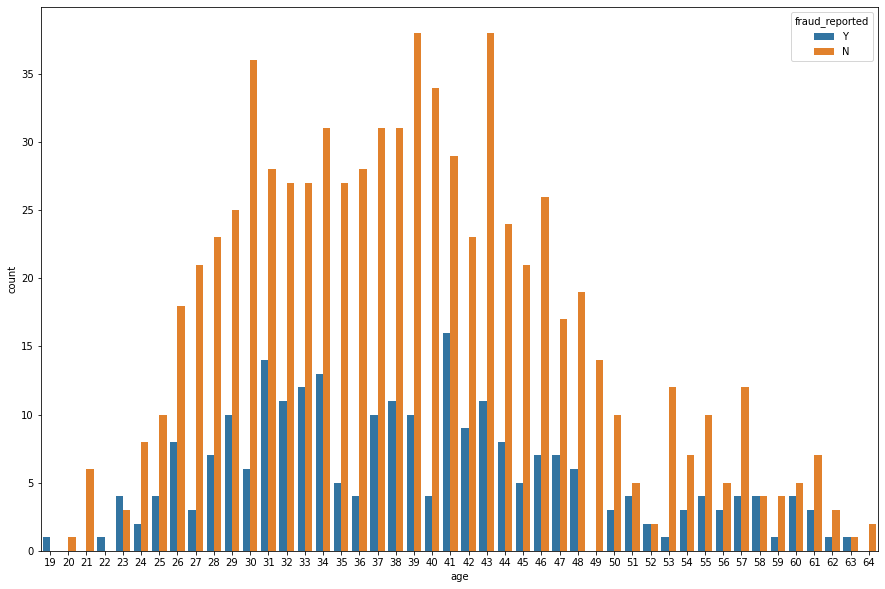

In [170]:
plt.figure(figsize=(15,10))
sns.countplot(x='age',hue='fraud_reported',data=df)

Most 41 year olds are reported as frauds followed by 31 year olds.

<Figure size 1080x720 with 0 Axes>

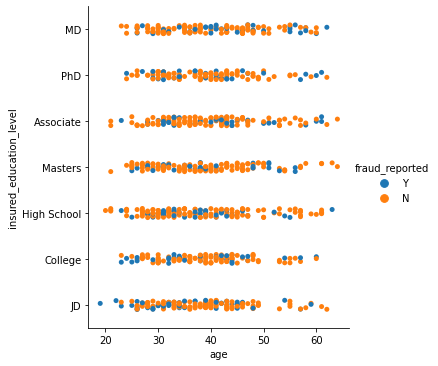

In [173]:
plt.figure(figsize=(15,10))
sns.catplot(x='age',hue='fraud_reported',y="insured_education_level",data=df)

Younger JD's have been reported as frauds whereas number is the highest among older MD holders.

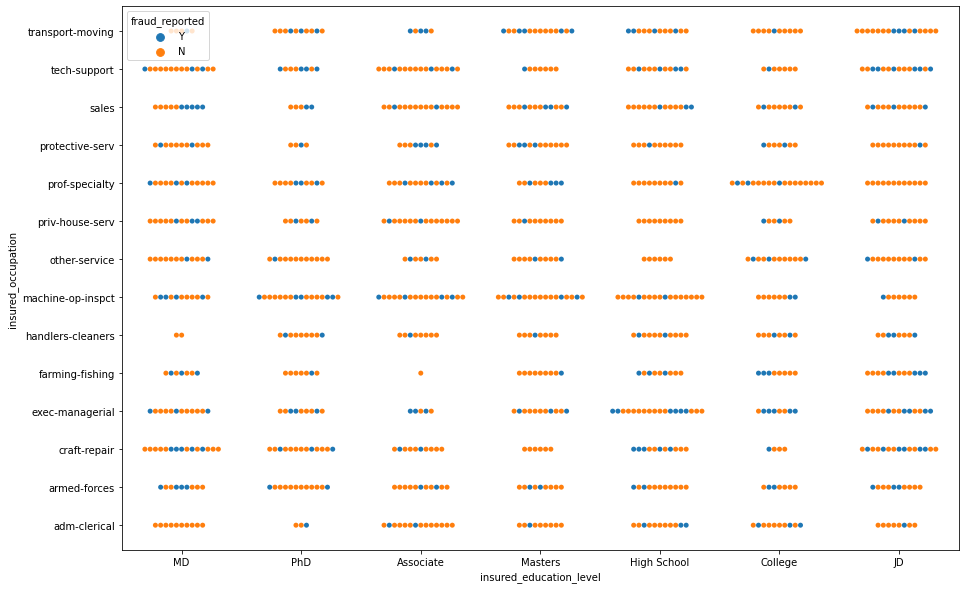

In [181]:
plt.figure(figsize=(15,10))
sns.swarmplot(y='insured_occupation',hue='fraud_reported',x="insured_education_level",data=df)
plt.show()

# Data Transformation:

### Checking Outliers:

In [276]:
z=np.abs(zscore(num_df))
threshold=3
df_new=df[(z<3).all(axis=1)]
df.shape,df_new.shape

((1000, 31), (984, 31))

### Checking Skewness:

In [277]:
df_new.skew()

months_as_customer             0.365250
age                            0.479959
policy_deductable              0.480814
umbrella_limit                 1.807983
capital-gains                  0.466667
capital-loss                  -0.375432
incident_hour_of_the_day      -0.035669
number_of_vehicles_involved    0.512032
bodily_injuries                0.007491
witnesses                      0.019974
total_claim_amount            -0.594706
auto_year                     -0.053496
dtype: float64

Only"umbrella limit" needs to be transformed

In [278]:
df_new["umbrella_limit"]=np.log1p(df_new["umbrella_limit"])

In [279]:
df_new["umbrella_limit"].skew()

1.5906905442660653

It has somewhat reduced but not a significant decrease

### Encoding:

In [281]:
le=LabelEncoder()
df_new["fraud_reported"]=le.fit_transform(df_new["fraud_reported"])

In [283]:
df_new["fraud_reported"]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 984, dtype: int32

In [284]:
x=df_new.drop(["fraud_reported"],axis=1)
y=df_new["fraud_reported"]

In [292]:
x_enc

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,0.000000,53300,0,5,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,15.424949,0,0,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,15.424949,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,15.607270,48900,-62400,5,1,1,2,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,15.607270,66000,-46000,20,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0.000000,0,0,20,1,0,1,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,0.000000,70900,0,23,1,2,3,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,14.914123,35100,0,4,3,2,3,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,15.424949,0,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Feature Importance:

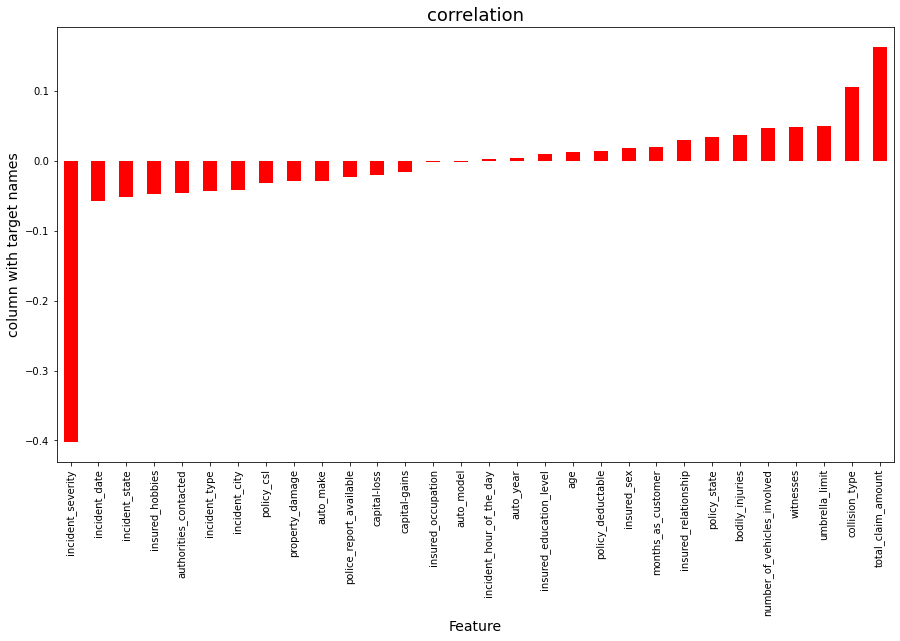

In [268]:
plt.figure(figsize=(15,8))
df_new.corr()['fraud_reported'].sort_values(ascending=True).drop(['fraud_reported']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

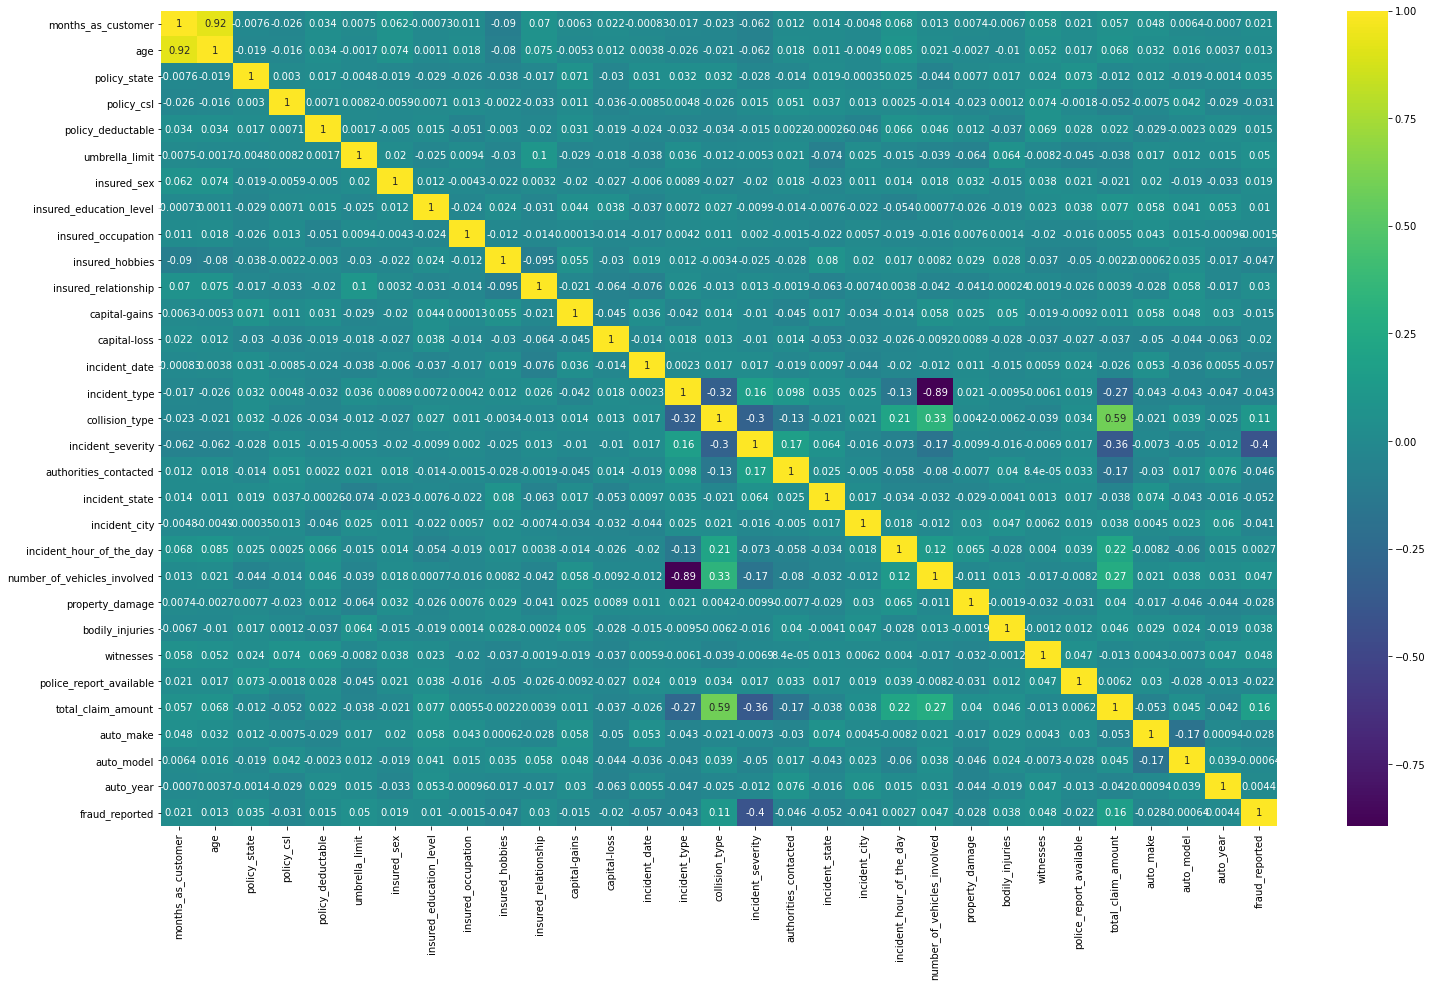

In [254]:
plt.figure(figsize = (25,15))
sns.heatmap(df_new.corr(), annot = True, cmap = "viridis")
plt.show()

**Observation:** age and months as a customer is highly collinear with each other

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif can only be used for numerical feeatures, we'll have to scale the just numerical_df and not the whole df like we did earler 
scaler=StandardScaler()
xs_vif=scaler.fit_transform(num_df)


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = num_df.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

    return(vif)

In [274]:
calc_vif(xs_vif)

,variables,VIF
0,months_as_customer,6.705846
1,age,6.719838
2,policy_deductable,1.013299
3,umbrella_limit,1.006536
4,capital-gains,1.015679
5,capital-loss,1.011671
6,incident_hour_of_the_day,1.067395
7,number_of_vehicles_involved,1.094305
8,bodily_injuries,1.009777
9,witnesses,1.012449


Observation: vif is still under 10 , so we can let it be and also the relationship with the target variable is not high, so it can be left as it is.

# PCA: reducing features or dimensionality for a better model

__We'll now have to scale our input encoded series which we created from df_new before we can proceed to pCA. Here, we don't have to scale just the numerical features but the whole input dataframe___ 

In [293]:
sc=StandardScaler()
xdf=pd.DataFrame(sc.fit_transform(x_enc),columns=x_enc.columns)
xdf.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.073102,0.987058,-0.222262,-0.483004,1.005057,0.955508,-0.957340,-0.819031,0.004971,0.461318,...,-0.180358,-0.213766,-0.111111,-0.151225,-0.140318,-0.158114,-0.151225,-0.205847,-0.154704,-0.124418
1,0.206938,0.333374,1.415983,2.067361,-0.907183,0.955508,-0.526603,-0.819031,-1.217926,-1.336453,...,-0.180358,-0.213766,-0.111111,-0.151225,-0.140318,-0.158114,-0.151225,-0.205847,-0.154704,-0.124418
2,-0.607257,-1.082941,1.415983,2.067361,0.352097,0.955508,-0.670182,1.146643,1.227868,1.360204,...,-0.180358,4.678004,-0.111111,-0.151225,-0.140318,-0.158114,-0.151225,-0.205847,-0.154704,-0.124418
3,0.449464,0.224427,1.415983,2.097506,0.847199,-1.276365,-0.957340,-0.819031,0.004971,0.461318,...,-0.180358,-0.213766,-0.111111,-0.151225,-0.140318,6.324555,-0.151225,-0.205847,-0.154704,-0.124418
4,0.206938,0.551269,-0.222262,2.097506,1.460695,-0.689783,1.196347,-0.819031,-1.217926,-0.437567,...,-0.180358,-0.213766,9.000000,-0.151225,-0.140318,-0.158114,-0.151225,-0.205847,-0.154704,-0.124418


In [299]:
for i in xdf.columns:
    print(xdf[i].isnull().sum())
    print("\n")

0


0


0


1


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0


0




In [300]:
xdf.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=217)

So, there is one null value in the feature "umbrella_limit" which was inhibiting PCA to be fitted on our scaled df => xdf. We can impute it using mean

In [301]:
xdf["umbrella_limit"].fillna(xdf["umbrella_limit"].mean(),inplace=True)

In [302]:
pca=PCA()

test=pca.fit(xdf)

In [303]:
test.explained_variance_ratio_

array([2.38517674e-02, 1.37249555e-02, 1.24870657e-02, 1.19645360e-02,
       1.17123321e-02, 1.15780050e-02, 1.14647520e-02, 1.14111454e-02,
       1.13320624e-02, 1.12089892e-02, 1.11572872e-02, 1.10341755e-02,
       1.08807446e-02, 1.07377440e-02, 1.05238816e-02, 1.00247627e-02,
       9.88491656e-03, 9.50917091e-03, 9.25081566e-03, 9.14748818e-03,
       8.95827884e-03, 8.81298213e-03, 8.69096458e-03, 8.45228874e-03,
       8.41904228e-03, 8.24856407e-03, 8.18670610e-03, 8.13085210e-03,
       8.06255798e-03, 8.01611766e-03, 7.93857838e-03, 7.72183726e-03,
       7.68889516e-03, 7.64748412e-03, 7.60297180e-03, 7.53701199e-03,
       7.45973191e-03, 7.40405627e-03, 7.25624741e-03, 7.18726314e-03,
       7.16309224e-03, 7.09529133e-03, 7.01040822e-03, 6.99014835e-03,
       6.89712515e-03, 6.85360461e-03, 6.78169278e-03, 6.69440382e-03,
       6.65326241e-03, 6.60723107e-03, 6.57245916e-03, 6.53934194e-03,
       6.47252441e-03, 6.45155324e-03, 6.39539803e-03, 6.34765734e-03,
      

In [304]:
var_cumsum=np.cumsum(test.explained_variance_ratio_)*100
var_cumsum

array([  2.38517674,   3.75767229,   5.00637886,   6.20283246,
         7.37406567,   8.53186617,   9.67834136,  10.8194559 ,
        11.95266214,  13.07356106,  14.18928978,  15.29270734,
        16.3807818 ,  17.4545562 ,  18.50694436,  19.50942063,
        20.49791228,  21.44882938,  22.37391094,  23.28865976,
        24.18448764,  25.06578586,  25.93488231,  26.78011119,
        27.62201542,  28.44687182,  29.26554243,  30.07862764,
        30.88488344,  31.68649521,  32.48035305,  33.25253677,
        34.02142629,  34.7861747 ,  35.54647188,  36.30017308,
        37.04614627,  37.7865519 ,  38.51217664,  39.23090295,
        39.94721218,  40.65674131,  41.35778213,  42.05679697,
        42.74650948,  43.43186994,  44.11003922,  44.7794796 ,
        45.44480584,  46.10552895,  46.76277486,  47.41670906,
        48.0639615 ,  48.70911682,  49.34865663,  49.98342236,
        50.61247302,  51.23527402,  51.85398376,  52.470196  ,
        53.0777231 ,  53.6774824 ,  54.27561312,  54.86

In [324]:
k=np.argmax(var_cumsum>90)
print('no of components explaning 90% variance: ',k)

no of components explaning 90% variance:  142


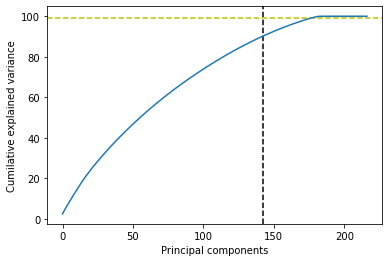

In [327]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='y',linestyle='--')

plt.plot(var_cumsum)
plt.show()

In [306]:
final_pca=PCA(n_components=142)
final=final_pca.fit_transform(xdf)

In [307]:
final

array([[-0.74543949,  0.40175822,  2.77632548, ..., -0.04882473,
         0.49086506,  0.95456773],
       [ 4.05491761,  1.55489663,  3.39496458, ..., -1.43707544,
         0.01870131, -0.2749128 ],
       [-0.39954913, -1.64885695, -0.66609682, ..., -0.32187166,
        -0.53424976,  0.89246654],
       ...,
       [-0.22407949, -1.68625009, -1.42663589, ...,  1.38249957,
        -0.35589881,  0.28825324],
       [-0.30543959,  1.24045904,  2.21083515, ...,  0.97537521,
        -0.35137218, -0.00772325],
       [ 4.2384426 ,  0.96739345,  4.10780306, ...,  0.56952156,
        -0.47303352, -0.75728334]])

In [308]:
xdf_new=pd.DataFrame(final)
xdf_new

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,-0.745439,0.401758,2.776325,-0.852316,-1.875535,0.603080,1.364247,2.088578,2.162730,-0.052711,...,0.464583,0.104199,-1.413963,0.667938,-0.646904,0.763544,-0.218965,-0.048825,0.490865,0.954568
1,4.054918,1.554897,3.394965,-0.054524,0.026005,-0.723650,-0.914602,-2.312906,0.581526,1.300906,...,-1.001569,0.378475,1.091870,0.281579,-0.959454,-0.028413,0.362952,-1.437075,0.018701,-0.274913
2,-0.399549,-1.648857,-0.666097,-0.252144,1.008903,1.251241,-1.664076,-2.828470,-1.056893,-0.480025,...,0.167034,0.325580,-0.749291,0.167051,0.114236,-0.799755,0.960419,-0.321872,-0.534250,0.892467
3,-0.270996,1.856054,0.067862,-0.404217,2.697690,0.646051,-1.779707,-0.029887,-0.225909,2.079479,...,-0.089964,0.820436,0.579925,0.919033,-0.319287,-1.081796,-1.295848,-0.300728,1.379713,-1.324697
4,4.470797,0.622768,1.446629,0.967128,-0.199376,3.397816,1.538172,-1.389617,0.578999,-0.462858,...,-0.206196,0.667316,-0.681928,1.141908,1.295788,2.824367,-0.714795,-0.453825,-0.208183,0.780975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-0.736330,2.596481,-3.054347,-1.859517,0.760781,-1.575824,1.193675,-0.167779,2.012291,2.057847,...,-2.488111,0.693739,-2.043366,-0.903453,-2.025117,-0.801310,-0.202775,1.199550,-0.215943,-1.524875
980,-2.056025,1.114108,0.756030,1.022482,0.382248,-0.428035,-0.873290,1.620812,0.494819,-2.514430,...,-1.082286,-0.714024,-1.254406,0.197331,0.038847,-0.599789,0.196391,-0.412182,1.056474,0.538609
981,-0.224079,-1.686250,-1.426636,-1.674411,-1.066905,-1.736403,-1.878831,-0.101287,-0.385297,-0.902213,...,-1.041215,0.064940,-0.776656,-0.304668,-1.731545,-0.392659,-0.945335,1.382500,-0.355899,0.288253
982,-0.305440,1.240459,2.210835,-2.003279,-1.699192,-2.310027,1.874715,-0.021767,-1.312314,1.024547,...,-0.485143,0.684957,-0.165428,-1.139388,0.585801,0.240612,-1.322543,0.975375,-0.351372,-0.007723


In [313]:
xdf.describe()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,...,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02
mean,1.101197e-16,2.473180e-16,5.744050e-16,1.472964e-16,1.579586e-16,5.573681e-17,-2.414509e-17,1.182433e-16,-7.943059e-17,-1.775906e-16,...,1.324031e-16,-8.670797e-17,3.173557e-16,-1.867296e-17,-1.255206e-16,2.346813e-16,-3.943323e-17,3.998044e-16,-2.935209e-16,-2.338351e-17
std,1.000509e+00,1.000509e+00,1.000509e+00,1.000000e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,...,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00
min,-1.767918e+00,-2.172413e+00,-1.041384e+00,-4.830036e-01,-9.071834e-01,-2.392302e+00,-1.675235e+00,-8.190308e-01,-1.217926e+00,-1.336453e+00,...,-1.803576e-01,-2.137664e-01,-1.111111e-01,-1.512251e-01,-1.403179e-01,-1.581139e-01,-1.512251e-01,-2.058467e-01,-1.547042e-01,-1.244182e-01
25%,-7.653323e-01,-7.560987e-01,-1.041384e+00,-4.830036e-01,-9.071834e-01,-8.838205e-01,-8.137608e-01,-8.190308e-01,-1.217926e+00,-6.622888e-01,...,-1.803576e-01,-2.137664e-01,-1.111111e-01,-1.512251e-01,-1.403179e-01,-1.581139e-01,-1.512251e-01,-2.058467e-01,-1.547042e-01,-1.244182e-01
50%,-3.991928e-02,-1.024149e-01,-2.222619e-01,-4.830036e-01,-9.071834e-01,1.239202e-01,4.771379e-02,-8.190308e-01,4.971127e-03,-4.375674e-01,...,-1.803576e-01,-2.137664e-01,-1.111111e-01,-1.512251e-01,-1.403179e-01,-1.581139e-01,-1.512251e-01,-2.058467e-01,-1.547042e-01,-1.244182e-01
75%,6.335239e-01,5.512689e-01,1.415983e+00,-4.830036e-01,9.261282e-01,9.555075e-01,7.656093e-01,1.146643e+00,1.227868e+00,4.613184e-01,...,-1.803576e-01,-2.137664e-01,-1.111111e-01,-1.512251e-01,-1.403179e-01,-1.581139e-01,-1.512251e-01,-2.058467e-01,-1.547042e-01,-1.244182e-01
max,2.381011e+00,2.730215e+00,1.415983e+00,2.122994e+00,2.698449e+00,9.555075e-01,1.627084e+00,2.129480e+00,1.227868e+00,1.360204e+00,...,5.544541e+00,4.678004e+00,9.000000e+00,6.612660e+00,7.126673e+00,6.324555e+00,6.612660e+00,4.857983e+00,6.463947e+00,8.037413e+00


As we can see we need to scale the input dataframe again after performing PCA, as the values are very different for each column.

In [314]:
temp=sc.fit_transform(xdf)
xdf_sc=pd.DataFrame(temp,columns=xdf.columns)


## Best Random State:

In [332]:
acc_max=0
rstate_max=0

for i in range(30,250):
    x_train, x_test,y_train, y_test=train_test_split(xdf_sc,y,test_size=.25,random_state=i)
    
    LogR=LogisticRegression()
    LogR.fit(x_train,y_train)
    predrf=LogR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>acc_max:
        acc_max=acc
        rstate_max=i

print("Best accuracy is", acc_max,"at Random State",rstate_max)

Best accuracy is 0.8495934959349594 at Random State 161


In [333]:
X_train, X_test, y_train, y_test = train_test_split(xdf_sc, y, test_size=0.25, random_state=161)
sm = SMOTE(random_state=161)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [334]:
y_train.value_counts()

0    548
1    548
Name: fraud_reported, dtype: int64

## Model 1: Logistic Regression

In [335]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)
print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l2'}
Best Score for Logistic Regression:  0.8668202573682026
------------------------------------------


In [337]:
lr = LogisticRegression(solver='liblinear',C= 0.1, penalty= 'l2').fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
    

In [338]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       195
           1       0.60      0.78      0.68        51

    accuracy                           0.85       246
   macro avg       0.77      0.82      0.79       246
weighted avg       0.87      0.85      0.85       246



In [339]:
pred_lr = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for k in range(2,10):
    lsscore=cross_val_score(lr,xdf_sc,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  79.369918699187
accuracy score is :  84.5528455284553


At cv=  3
Cross Val score :  79.26829268292683
accuracy score is :  84.5528455284553


At cv=  4
Cross Val score :  80.38617886178862
accuracy score is :  84.5528455284553


At cv=  5
Cross Val score :  81.40474463897233
accuracy score is :  84.5528455284553


At cv=  6
Cross Val score :  81.40243902439025
accuracy score is :  84.5528455284553


At cv=  7
Cross Val score :  81.20784484006369
accuracy score is :  84.5528455284553


At cv=  8
Cross Val score :  82.52032520325203
accuracy score is :  84.5528455284553


At cv=  9
Cross Val score :  82.21480863682699
accuracy score is :  84.5528455284553




At cv=  8
- Cross Val score :  82.52032520325203
- accuracy score is :  84.5528455284553

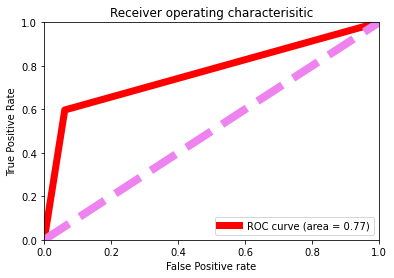

In [340]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 2: Decision Tree Classifier

In [341]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)
       

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 16}
Best Score for Decision Tree:  0.8950767953507679


In [352]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=16).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test) 

In [353]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       195
           1       0.61      0.73      0.66        51

    accuracy                           0.85       246
   macro avg       0.77      0.80      0.78       246
weighted avg       0.86      0.85      0.85       246



<AxesSubplot:title={'center':'Feature Importances of Decision Tree'}, xlabel='Importance'>

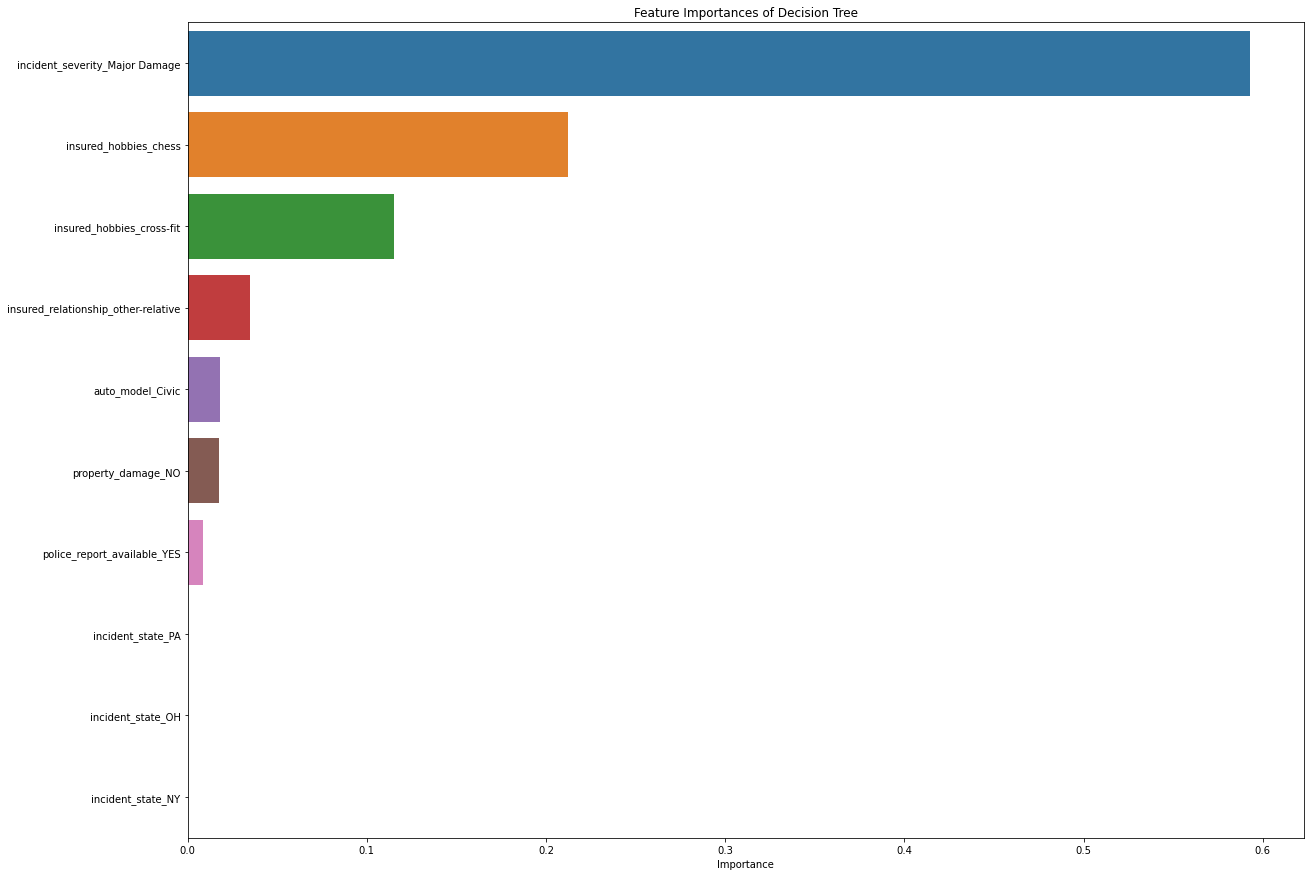

In [349]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=xdf_sc.columns).sort_values(by="Importance",ascending=False)

plt.figure(figsize=(20,15))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"][0:10],feat.index[0:10])
# top 10 feature importances

In [355]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,xdf_sc,y,cv=k)
    dtc=dtscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  80.08130081300813
accuracy score is :  84.5528455284553


At cv=  3
Cross Val score :  82.92682926829268
accuracy score is :  84.5528455284553


At cv=  4
Cross Val score :  84.14634146341463
accuracy score is :  84.5528455284553


At cv=  5
Cross Val score :  81.10276597948824
accuracy score is :  84.5528455284553


At cv=  6
Cross Val score :  82.6219512195122
accuracy score is :  84.5528455284553


At cv=  7
Cross Val score :  82.42003184252424
accuracy score is :  84.5528455284553


At cv=  8
Cross Val score :  82.21544715447155
accuracy score is :  84.5528455284553


At cv=  9
Cross Val score :  82.52154573255491
accuracy score is :  84.5528455284553




At cv=  4
- Cross Val score :  84.14634146341463
- accuracy score is :  84.5528455284553

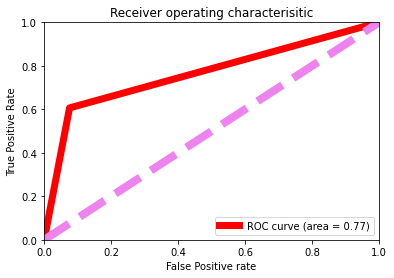

In [356]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_dt,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 3: Random Forest Classifier

In [357]:
forest_params = {"max_depth": list(range(2,10,3)),"min_samples_leaf": list(range(5,20,3)),"n_estimators":[200,250,300,350,400]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

Best Parameters for Random Forest:  {'n_estimators': 250, 'min_samples_leaf': 11, 'max_depth': 2}
Best Score for Random Forest:  0.8540929846409299




In [358]:
rfc = RandomForestClassifier(max_depth=2, min_samples_leaf=11,n_estimators=250).fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

<AxesSubplot:title={'center':'Feature Importances of Random Forest'}, xlabel='Importance'>

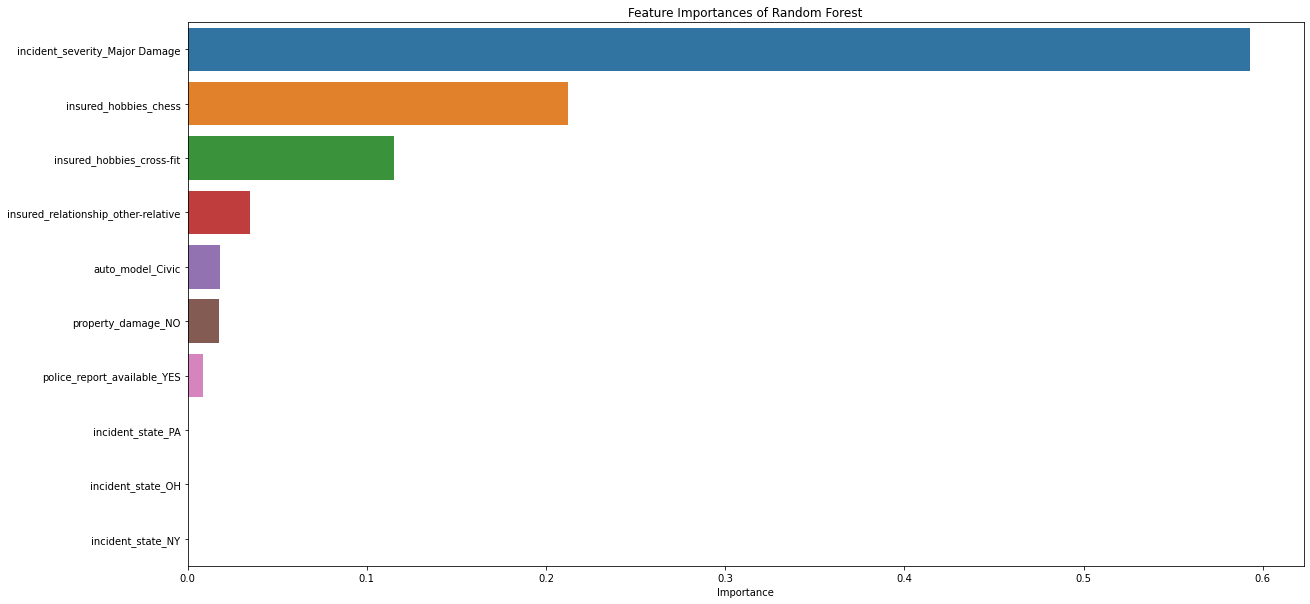

In [360]:
feat2=pd.DataFrame({"Importance": forest_clf.feature_importances_}, 
                  index=xdf_sc.columns).sort_values(by="Importance",ascending=False)
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Random Forest")

sns.barplot(feat["Importance"][:10],feat.index[0:10])

In [361]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       195
           1       0.56      0.71      0.63        51

    accuracy                           0.83       246
   macro avg       0.74      0.78      0.76       246
weighted avg       0.84      0.83      0.83       246



In [362]:
pred_rfc = rfc.predict(X_test)
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,6):
    rsscore=cross_val_score(rfc,xdf_sc,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  75.50813008130082
accuracy score is :  82.52032520325203


At cv=  3
Cross Val score :  75.50813008130083
accuracy score is :  82.52032520325203


At cv=  4
Cross Val score :  75.50813008130082
accuracy score is :  82.52032520325203


At cv=  5
Cross Val score :  75.50813218688491
accuracy score is :  82.52032520325203




At cv=  5
- Cross Val score :  75.50813218688491
- accuracy score is :  82.52032520325203

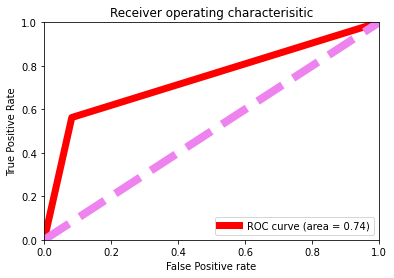

In [363]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_rfc,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 4: SV Classifier

In [366]:
from sklearn.svm import SVC

In [368]:
svc_params = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = RandomizedSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_
print("Best Parameters for SVM: ", grid_svc.best_estimator_)
print("Best Score for SVM: ", grid_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  SVC(C=100.0)
Best Score for SVM:  0.9288667496886676
------------------------------------------


In [370]:
grid_svc.best_params_

{'kernel': 'rbf', 'C': 100.0}

In [371]:
svm = SVC(C=100.0, kernel='rbf').fit(X_train, y_train)
pred_train4 = svm.predict(X_train)
pred_test4 = svm.predict(X_test) 

In [372]:
print(classification_report(y_test,pred_test4))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       195
           1       0.73      0.53      0.61        51

    accuracy                           0.86       246
   macro avg       0.81      0.74      0.76       246
weighted avg       0.85      0.86      0.85       246



__Feature importances can be found only for linear kernel__

In [394]:
pred_svc = svm.predict(X_test)
lss = accuracy_score(y_test,pred_svc)
for k in range(2,10):
    lsscore=cross_val_score(svm,xdf_sc,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  79.8780487804878
accuracy score is :  86.1788617886179


At cv=  3
Cross Val score :  79.47154471544714
accuracy score is :  86.1788617886179


At cv=  4
Cross Val score :  80.89430894308943
accuracy score is :  86.1788617886179


At cv=  5
Cross Val score :  80.08494768465762
accuracy score is :  86.1788617886179


At cv=  6
Cross Val score :  80.79268292682927
accuracy score is :  86.1788617886179


At cv=  7
Cross Val score :  80.18598928933275
accuracy score is :  86.1788617886179


At cv=  8
Cross Val score :  80.38617886178862
accuracy score is :  86.1788617886179


At cv=  9
Cross Val score :  80.5847465480493
accuracy score is :  86.1788617886179




At cv=  9
- Cross Val score :  80.5847465480493
- accuracy score is :  86.1788617886179

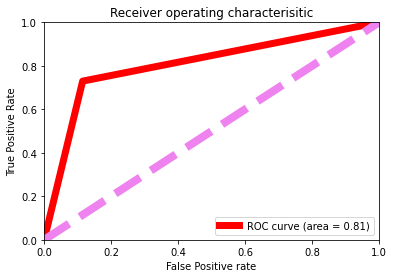

In [395]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test4,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 5: Gradient Boosting Classifier

In [383]:
params={'n_estimators':[15, 20,25,100,50,],
           'learning_rate':[0.15, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
           'max_features':[1,2,3,4],
           'max_depth':[1,2,3,4],
           'random_state':[0,1,2,5]
           }

In [386]:
rand_gbc = RandomizedSearchCV(GradientBoostingClassifier(), params)
rand_gbc.fit(X_train, y_train)
gbc= rand_gbc.best_estimator_
print("Best Parameters for GBC: ", rand_gbc.best_params_)
print("Best Score for GBC: ", rand_gbc.best_score_)
print("------------------------------------------")

Best Parameters for GBC:  {'random_state': 1, 'n_estimators': 20, 'max_features': 4, 'max_depth': 4, 'learning_rate': 0.15}
Best Score for GBC:  0.8514321295143213
------------------------------------------


In [387]:
gbc = GradientBoostingClassifier(learning_rate=0.15, max_depth=4, max_features=4,n_estimators=20, random_state=1).fit(X_train, y_train)
pred_train5 = lr.predict(X_train)
pred_test5 = lr.predict(X_test)

In [388]:
print(classification_report(y_test,pred_test5))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       195
           1       0.60      0.78      0.68        51

    accuracy                           0.85       246
   macro avg       0.77      0.82      0.79       246
weighted avg       0.87      0.85      0.85       246



In [393]:
gbcs = accuracy_score(y_test,pred_test5)
for k in range(2,10):
    lsscore=cross_val_score(gbc,xdf_sc,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",gbcs*100)
    print("\n")

At cv=  2
Cross Val score :  77.03252032520325
accuracy score is :  84.5528455284553


At cv=  3
Cross Val score :  76.72764227642276
accuracy score is :  84.5528455284553


At cv=  4
Cross Val score :  77.23577235772359
accuracy score is :  84.5528455284553


At cv=  5
Cross Val score :  76.11726924272247
accuracy score is :  84.5528455284553


At cv=  6
Cross Val score :  77.23577235772359
accuracy score is :  84.5528455284553


At cv=  7
Cross Val score :  76.83166883774787
accuracy score is :  84.5528455284553


At cv=  8
Cross Val score :  76.21951219512195
accuracy score is :  84.5528455284553


At cv=  9
Cross Val score :  76.93170234454638
accuracy score is :  84.5528455284553




At cv=  6
- Cross Val score :  77.23577235772359
- accuracy score is :  84.5528455284553

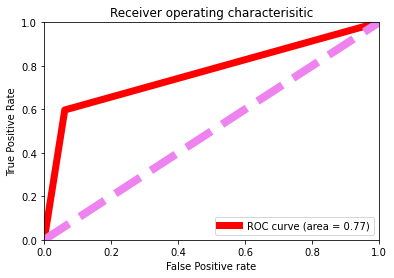

In [392]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test5,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

__Conclusion__: Support Vector Classifier performs the best with auc roc curve area = 0.81 and CV score = 80.5847465480493  and the accuracy score =86.1788617886179 

## Saving the model:

In [396]:
filename = "Insurance_fraud_pred.pkl"
pickle.dump(svm,open(filename,'wb'))